* データマイニング特別演習
* 気象庁からダウンロードしたさいたま市の気温データを分析

In [ ]:
# google colab の場合は以下のコメントアウトを外す
#!wget https://github.com/KHiraGit/sudspg_ds/raw/main/dm02_data_6.zip
#!unzip dm02_data_6.zip -d dm02_data_6

In [1]:
# 利用するライブラリをインポート
import os
import glob
import pandas as pd

In [5]:
data_folder = os.path.join('dm02_data_6') # データを格納したフォルダ名
points = ['saitama', 'osaka', 'tajimi', 'fukuoka', 'niigata', 'sapporo'] # 比較対象の観測地点のフォルダ名
df_pos = {} # データフレームを格納する辞書

# 各地点のデータをデータフレームに読み込む
for point in points:
    csv_files = sorted(glob.glob(os.path.join(data_folder, point, 'data-20??.csv'))) # 読み込むファイルを設定
    for csv_file in csv_files:
        df = pd.read_csv(csv_file, 
                         header=3, # 3行目までを無視、4行目を列名として設定
                         names=['年月日時', '気温', '品質情報', '均質番号'], # 列名を設定
                         encoding='shift-jis')
        df['年月日時'] = pd.to_datetime(df['年月日時']) # '年月日時' を datetime型に変換
        if point in df_pos.keys():
            df_pos[point] = df_pos[point].append(df) # データフレームを追加
        else:
            df_pos[point] = df.copy() # データフレームを作成(コピー)
        
    # 読み込んだ各地点のデータ数を確認
    print(point, len(df_pos[point]))

saitama 24289
osaka 24289
tajimi 24289
fukuoka 24289
niigata 24299
sapporo 24299


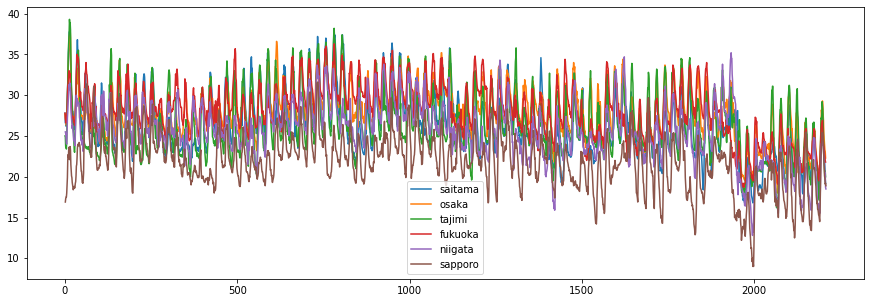

In [6]:
# 2022年の各地点の気温の折れ線グラフを作成
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))
for point in points:
    plt.plot(df_pos[point][(df_pos[point]['年月日時'].dt.year==2022)]['気温'], label=point)
plt.legend()
plt.show()


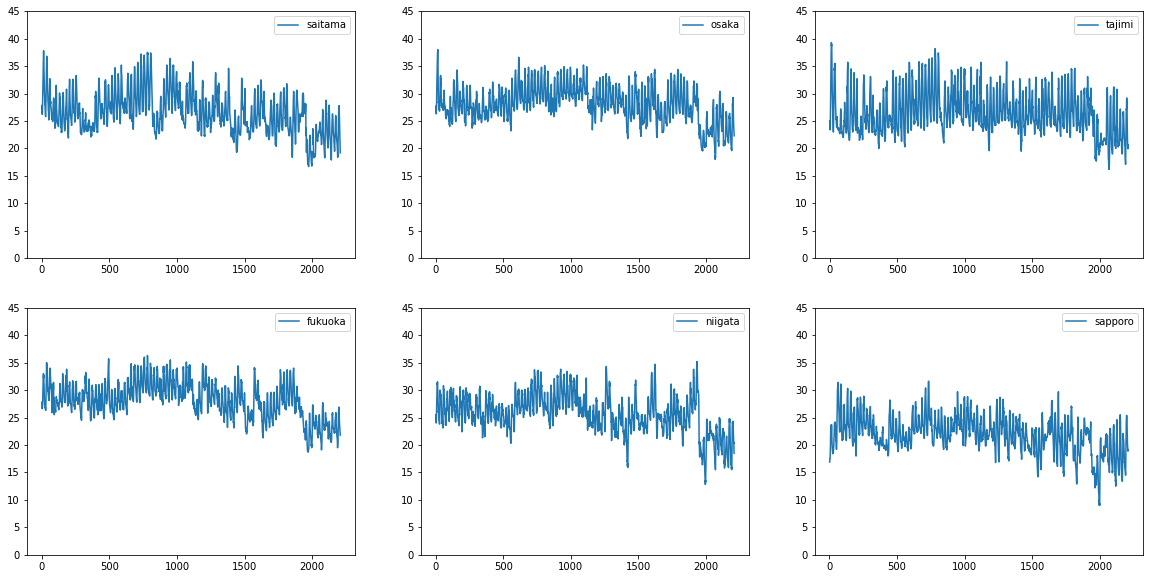

In [7]:
# 2022年の各地点の気温の折れ線グラフを作成
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
_data = 0
for point in points:
    _data = _data + 1
    ax = fig.add_subplot(2,3,_data)
    df_pos[point][(df_pos[point]['年月日時'].dt.year==2022)].plot(y='気温', ylim=[0,45], label=point, ax=ax)
plt.show()

## 各観測地点の35度以上のデータ数
saitama 509
osaka 358
tajimi 838
fukuoka 195
niigata 123
sapporo 3


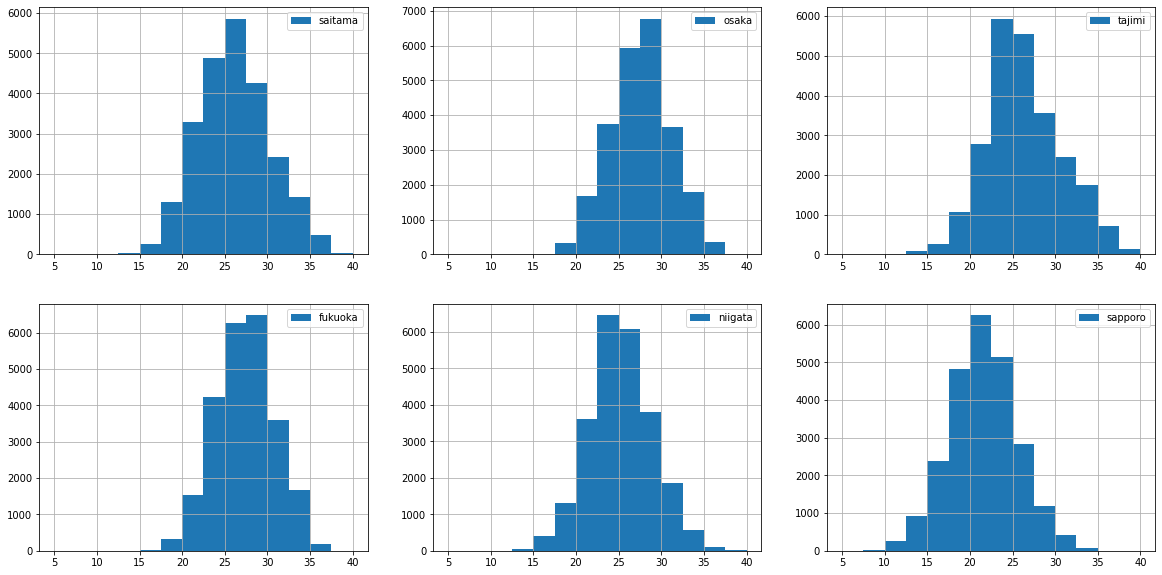

In [8]:
# 各地点の35度以上のデータを抽出し、気温のヒストグラムを作成
fig = plt.figure(figsize=(20, 10))
_data = 0
print('## 各観測地点の35度以上のデータ数')
for point in points:
    # 35度以上のデータを抽出
    df_35 = df_pos[point][df_pos[point]['気温'] >= 35] # 条件指定で抽出
    print(point, len(df_35)) # df_35 の行数を表示
    # ヒストグラムを作成
    _data = _data + 1
    ax = fig.add_subplot(2,3,_data)
    df_pos[point]['気温'].hist(label=point, bins=14, range=[5,40], ax=ax)
    ax.legend()
plt.show()